In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_root = '/content/drive/My Drive/Colab Notebooks/dataset'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(data_root):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1009.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1003.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1001.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1008.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1006.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1007.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1004.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1000.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1005.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1002.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1015.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1013.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1014.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1019.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1018

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.optimizers import Adam

In [4]:
X_train = []
Y_train = []
image_size = 224
labels = ['glioma','meningioma', 'pituitary']
for i in labels:
    folderPath = os.path.join(data_root, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train.ndim

4

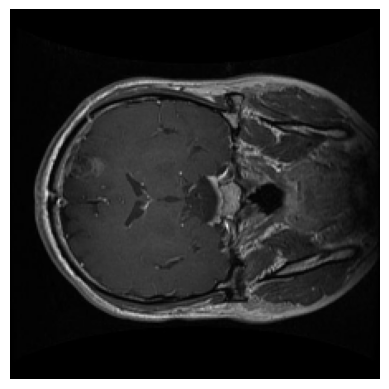

In [6]:
plt.axis('off')
plt.imshow(X_train[32])

In [7]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2022)
X_train.shape

(3079, 224, 224, 3)

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.3,
    height_shift_range=0.2
)

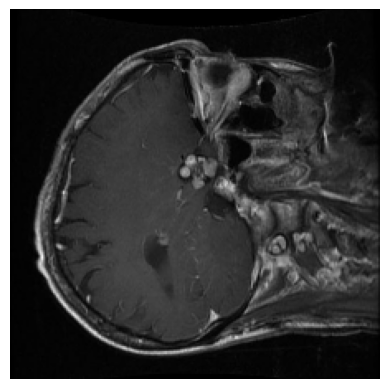

In [9]:
plt.axis('off')
plt.imshow(X_train[32])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 2022)

In [11]:
len(X_train)

2309

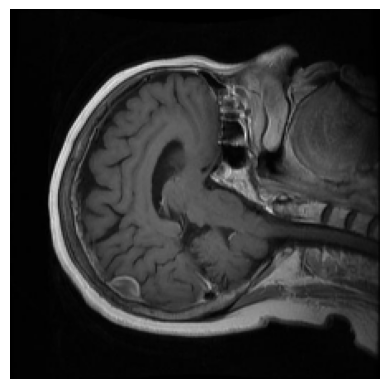

In [12]:
plt.axis('off')
plt.imshow(X_train[89])

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
ds_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

51877672/51877672 [==============================] - 0s 0us/step


In [15]:
for layer in ds_model.layers:
    layer.trainable = False

In [16]:
model = Sequential()
model.add(ds_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 1024)              83493888  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               5

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs = 200, validation_split = 0.2)

Epoch 1/200
58/58 [==============================] - 41s 316ms/step - loss: 22.1778 - accuracy: 0.5019 - val_loss: 1.5972 - val_accuracy: 0.6926
Epoch 2/200
58/58 [==============================] - 9s 162ms/step - loss: 1.8271 - accuracy: 0.6275 - val_loss: 0.5196 - val_accuracy: 0.7468
Epoch 3/200
58/58 [==============================] - 9s 162ms/step - loss: 0.7486 - accuracy: 0.7071 - val_loss: 0.4881 - val_accuracy: 0.7922
Epoch 4/200
58/58 [==============================] - 10s 165ms/step - loss: 0.5698 - accuracy: 0.7574 - val_loss: 0.4629 - val_accuracy: 0.8030
Epoch 5/200
58/58 [==============================] - 10s 166ms/step - loss: 0.5140 - accuracy: 0.7677 - val_loss: 0.4176 - val_accuracy: 0.8074
Epoch 6/200
58/58 [==============================] - 9s 148ms/step - loss: 0.4656 - accuracy: 0.8078 - val_loss: 0.4336 - val_accuracy: 0.8377
Epoch 7/200
58/58 [==============================] - 9s 152ms/step - loss: 0.4690 - accuracy: 0.7991 - val_loss: 0.3783 - val_accuracy: 0.

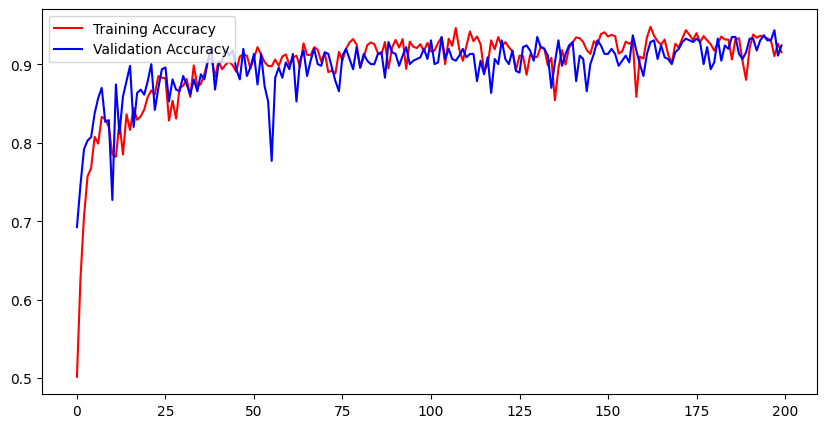

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

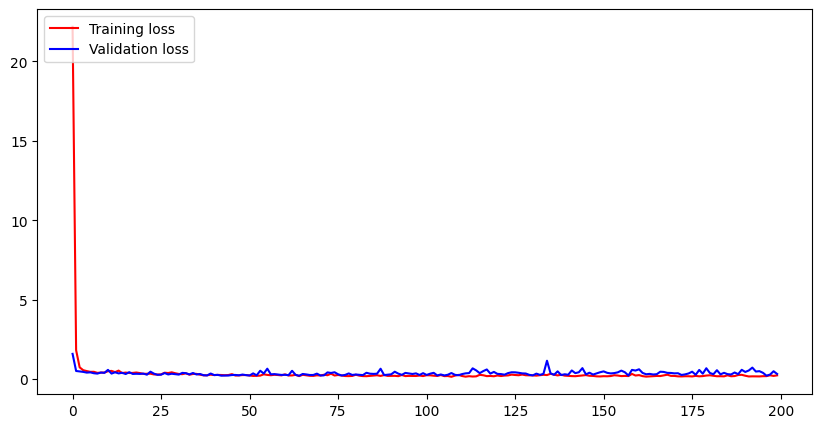

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [22]:
y_pred = model.predict(X_test)

25/25 [==============================] - 7s 168ms/step


In [23]:
a = y_pred[500]
indices = a.argmax()

if indices == 0:
    print('glioma_tumor')
elif indices == 1:
    print('meningioma_tumor')
elif indices == 2:
    print('pituitary_tumor')
else:
    print('Error in predicting the type of tumor')

pituitary_tumor


In [24]:
y_pred_labels = np.argmax(y_pred, axis = 1)
y_pred_labels

array([0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0,

In [25]:
y_test_new[500]

2

In [26]:
score = accuracy_score(y_test_new, np.argmax(model.predict(X_test), axis = 1))
score

25/25 [==============================] - 3s 110ms/step


0.9168831168831169

In [27]:
loss, metrics = model.evaluate(X_test, y_test)
loss, metrics

25/25 [==============================] - 3s 109ms/step - loss: 0.4110 - accuracy: 0.9169


(0.41101160645484924, 0.916883111000061)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, y_pred_labels))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       360
           1       0.82      0.82      0.82       177
           2       0.95      0.98      0.96       233

    accuracy                           0.92       770
   macro avg       0.90      0.91      0.91       770
weighted avg       0.92      0.92      0.92       770

